In [1]:
import pandas as pd
import numpy as np
from scipy. stats import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
def BSM(s, r, sigma, t1, t2, strike):
    dt = t2 - t1
    return r * s * dt + sigma * s * np.random.normal(0, np.sqrt(dt))

In [3]:
def d_plus(s, r, sigma, T, t, strike):
    '''
    for call options price
    '''
    return ((np.log(s / strike)) + (T - t) * (r + (sigma ** 2) / 2)) / (sigma * np.sqrt(T - t))


In [4]:
def d_minus(s, r, sigma, T, t, strike):
    '''
    for call options price
    '''
    return ((np.log(s / strike)) + (T - t) * (r - (sigma ** 2) / 2)) / (sigma * np.sqrt(T - t))

In [5]:
def price_call_option(s, r, sigma, T, t, strike):
    I_plus = norm.cdf(d_plus(s, r, sigma, T, t, strike))
    I_minus = norm.cdf(d_minus(s, r, sigma, T, t, strike))
    ans = s * I_plus - strike * np.exp(-1 * r * (T - t)) * I_minus
    return ans

In [6]:
def delta_plus(s, r, sigma, T, t):
    '''
    for barrier call options
    '''
    tau = T - t 
    return (1 / (sigma * np.sqrt(tau))) * (np.log(s) + (r + pow(sigma, 2) / 2) * tau)

In [7]:
def delta_minus(s, r, sigma, T, t):
    '''
    for barrier call options
    '''
    tau = T - t 
    return (1 / (sigma * np.sqrt(tau))) * (np.log(s) + (r - pow(sigma, 2) / 2) * tau)

In [40]:
def barrier_options_exact(s, r, sigma, T, t, K, B):
    '''
    0 <= t <= T
    s = s(t)
    0 < s <= B / s
    '''
    tau = T - t
    first_part = s * (norm.cdf(delta_plus(s / K, r, sigma, T, t)) - norm.cdf(delta_plus(s / B, r, sigma, T, t)))
    second_part = np.exp(-tau * r) * K * (norm.cdf(delta_minus(s / K, r, sigma, T, t)) - norm.cdf(delta_minus(s / B, r, sigma, T, t)))
    third_part = -B * ((s / B) ** (-2 * r / pow(sigma, 2))) * (norm.cdf(delta_plus(pow(B, 2) / (K * s), r, sigma, T, t)) - norm.cdf(delta_plus(B / s, r, sigma, T, t)))
    fourth_part = np.exp(-r * tau) * K * ((s / B) ** (-2 * r / pow(sigma, 2) + 1)) * (norm.cdf(delta_minus(pow(B, 2) / (K * s), r, sigma, T, t)) - norm.cdf(delta_minus(pow(B, 2) / s, r, sigma, T, t)))
    if first_part - second_part - third_part + fourth_part < B:
        return first_part - second_part - third_part + fourth_part
    return 0

In [59]:
def get_plot(data):
    S_0, r, sigma, T, t, K, B, periods = data
    t_grid = np.linspace(0, T, periods)
    # цена актива на всем периоде
    S = np.zeros(periods)
    S[0] = S_0
    for t in range(1, periods):
        t1 = (t - 1) / periods
        t2 = t / periods
        S[t] = S[t - 1] + BSM(S[t - 1], r, sigma, t1, t2, K)

    # цена колл-опциона на всем периоде
    C_exact = np.zeros(periods)
    for t in range(periods):
        C_exact[t] = price_call_option(S[t], r, sigma, T, t / periods, K)

    # барьерного опциона на всем периоде
    B_exact = np.zeros(periods)
    for t in range(periods):
        if B <= K:
            break
        if B <= S[t]:
            break
        B_exact[t] = barrier_options_exact(S[t], r, sigma, T, t / periods, K, B)

    plt.rcParams['font.size'] = '10'
    fig, ax = plt.subplots()
    ax.plot()
    ax.plot(S, linewidth=2, label='asset price')
    ax.plot(C_exact, linewidth=5, label='call options price')
    ax.plot(B_exact, linewidth=1,  label='barrier call options price')
    ax.plot(np.linspace(B, B, periods), linewidth=3, label='')

    ax.grid(color = 'black', linewidth = 1, linestyle = '-')    
    plt.legend(loc = 'best', fancybox = True, shadow = True)


    #plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))  # интервал написания значений оси OX
    #plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY

    plt.xticks(rotation=25)

    fig.set_figwidth(8)
    fig.set_figheight(7)

    plt.title(f'')
    plt.show()
    #return S, C_exact, B_exact

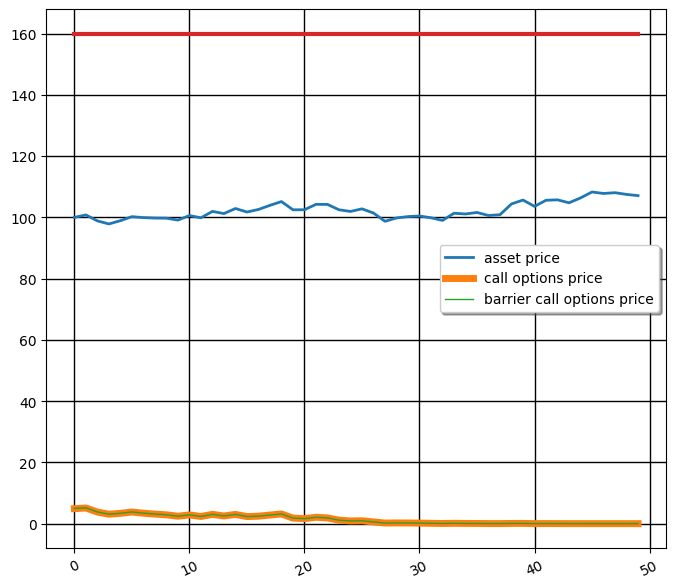

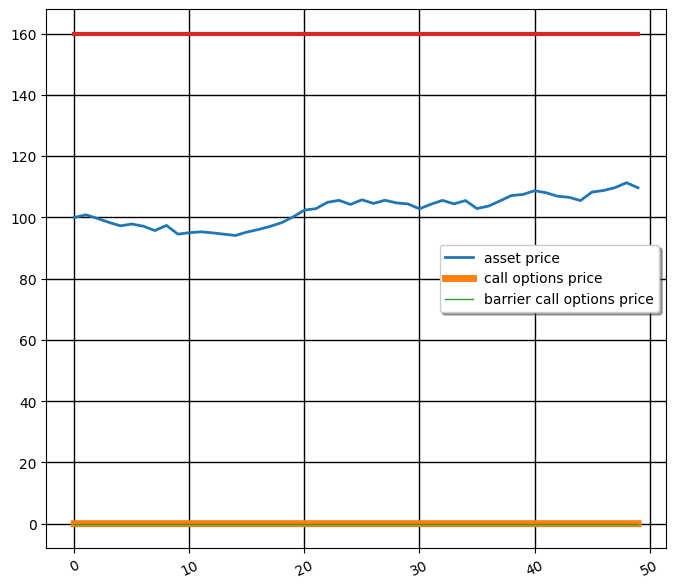

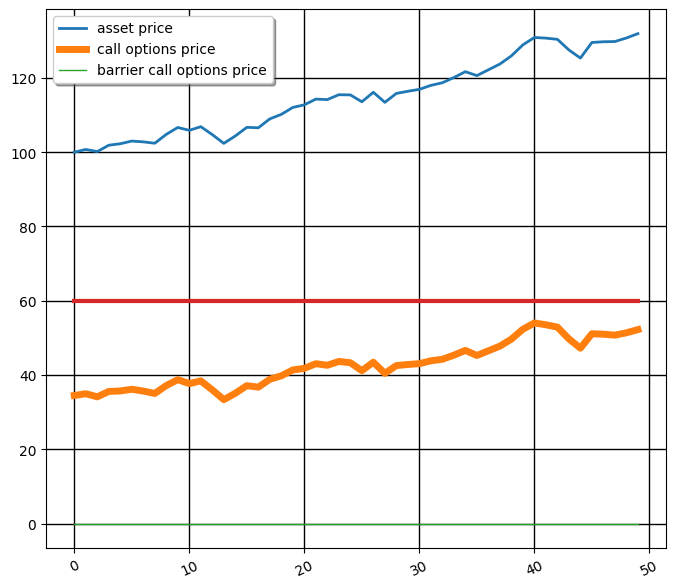

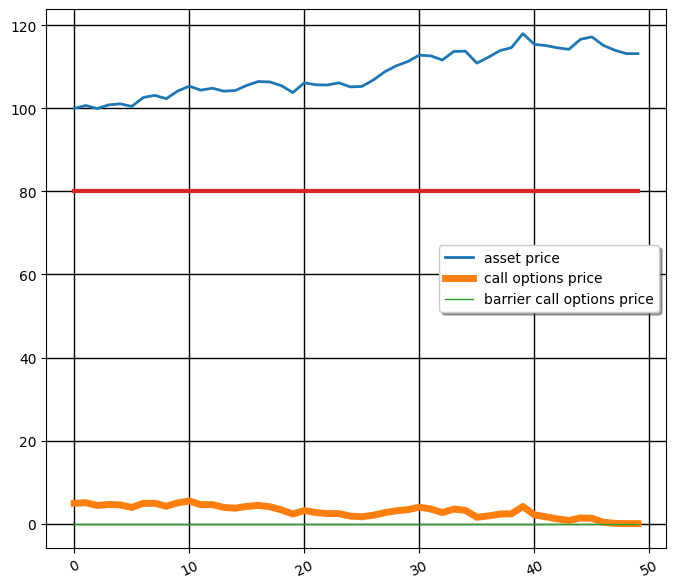

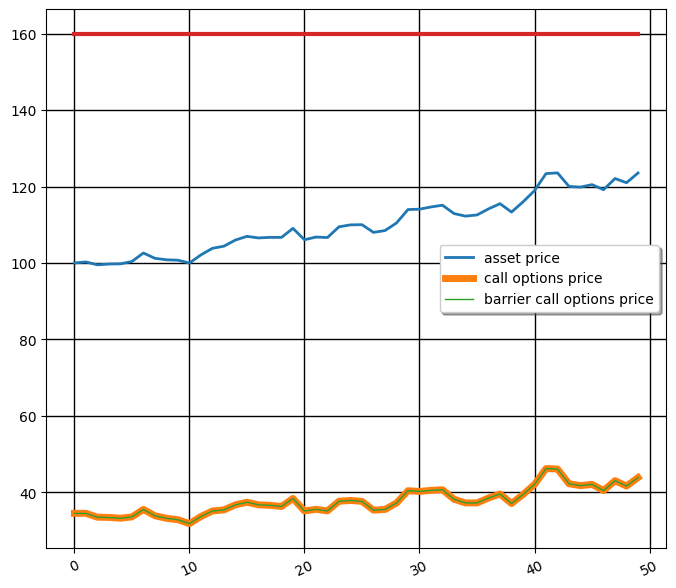

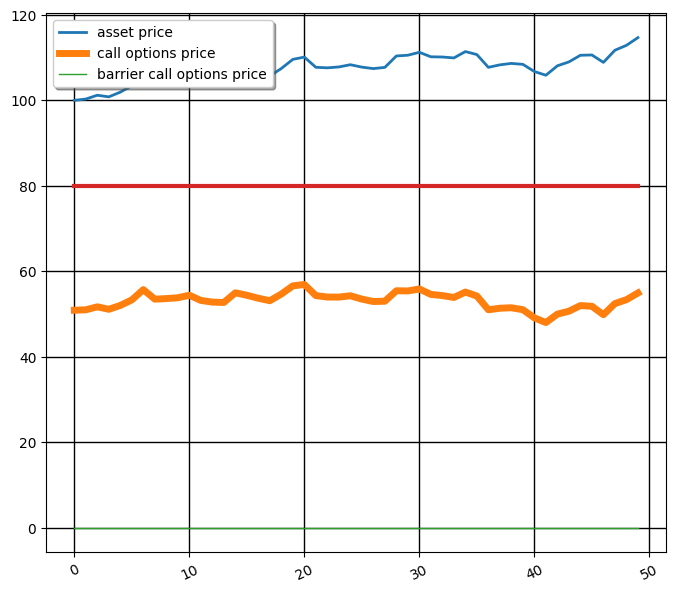

(array([100.        , 100.29794831, 101.19446262, 100.81560201,
        101.91647037, 103.41251067, 106.01732463, 103.98854405,
        104.32467901, 104.72419691, 105.51575705, 104.50843749,
        104.31687375, 104.44184439, 106.91011234, 106.54526046,
        106.05066464, 105.68951676, 107.45492871, 109.58904663,
        110.11976299, 107.73265156, 107.60774603, 107.81167874,
        108.33587792, 107.76846234, 107.42535981, 107.71403812,
        110.38120029, 110.55939933, 111.23972367, 110.19044088,
        110.14192151, 109.92141926, 111.41331861, 110.70834812,
        107.72073367, 108.30564062, 108.64263285, 108.42002563,
        106.73674115, 105.87621515, 108.08172562, 108.99167045,
        110.54791957, 110.6129304 , 108.8811572 , 111.72170273,
        112.86655253, 114.67142997]),
 array([50.87615482, 50.97721423, 51.67605051, 51.09871958, 52.00032214,
        53.29629798, 55.70024563, 53.46979366, 53.60344893, 53.7996756 ,
        54.38712971, 53.17488607, 52.77757691, 5

In [62]:
# test = S_0, r, sigma, T, t, K, B, periods
test_1 = [100, 0.2, 0.1, 1, 0, 120, 160, 50]    # S < K < B
test_2 = [100, 0.2, 0.1, 1, 0, 180, 160, 50]    # S < B < S
test_3 = [100, 0.2, 0.1, 1, 0, 80, 60, 50]      # B < K < S
test_4 = [100, 0.2, 0.1, 1, 0, 120, 80, 50]     # B < S < K
test_5 = [100, 0.2, 0.1, 1, 0, 80, 160, 50]     # K < S < B
test_6 = [100, 0.2, 0.1, 1, 0, 60, 80, 50]      # K < B < S
get_plot(test_1)
get_plot(test_2)
get_plot(test_3)
get_plot(test_4)
get_plot(test_5)
get_plot(test_6)